In [1]:
import numpy as np
import xarray as xr 
import matplotlib.pyplot as plt 

In [2]:
with xr.open_dataset('./crmpt18-b/nc/steady_state.nc') as src: 
    # correct for minimum ice thickness
    # src["height"] = xr.where(src.height <= 10, 0, src.height)
    # apply sigma coordinate transform for vertical coordinate
    src["Z"]      = src.zbed + src.Z * src.height 
    # Calculate the magnitude of the velocity vectors
    src['vel_m']  = np.sqrt(src['velocity 1']**2 + src['velocity 2']**2)       
    
Vol = src.height.isel(coord_2=-1).integrate("coord_1") /\
      src.height.isel(coord_2=-1).isel(t=0).integrate("coord_1")

Text(0.5, 0, 'Time (years)')

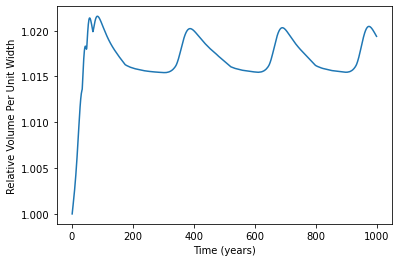

In [3]:

fig, ax = plt.subplots()

ax.plot(Vol.t, Vol)

ax.set_ylabel('Relative Volume Per Unit Width')
ax.set_xlabel('Time (years)')



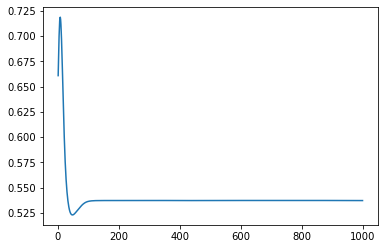

In [4]:
plt.plot(src.t, src.vel_m.isel(coord_2=-1).max(dim=('coord_1'))*(1/50))

In [5]:
def calc_H_firm(src, d_firn=0.03):
    H_firn = np.maximum(src['zs accumulation flux 2'].isel(coord_2=-1, t=-1)/ 0.1, 0)
    H_firn = np.minimum(src.height.isel(coord_2=-1, t=-1), H_firn)
    
    return H_firn

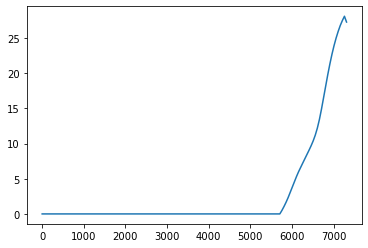

In [6]:
# plt.plot(src.coord_1, src.height.isel(coord_2=-1, t=-1))
plt.plot(src.coord_1, calc_H_firm(src))

In [7]:
z   = np.linspace(6,0)
z_s = 6
z_s-z

array([0.        , 0.12244898, 0.24489796, 0.36734694, 0.48979592,
       0.6122449 , 0.73469388, 0.85714286, 0.97959184, 1.10204082,
       1.2244898 , 1.34693878, 1.46938776, 1.59183673, 1.71428571,
       1.83673469, 1.95918367, 2.08163265, 2.20408163, 2.32653061,
       2.44897959, 2.57142857, 2.69387755, 2.81632653, 2.93877551,
       3.06122449, 3.18367347, 3.30612245, 3.42857143, 3.55102041,
       3.67346939, 3.79591837, 3.91836735, 4.04081633, 4.16326531,
       4.28571429, 4.40816327, 4.53061224, 4.65306122, 4.7755102 ,
       4.89795918, 5.02040816, 5.14285714, 5.26530612, 5.3877551 ,
       5.51020408, 5.63265306, 5.75510204, 5.87755102, 6.        ])

In [8]:
F = calc_H_firm(src)

In [9]:
F = calc_H_firm(src)[-15].values
z = src.Z.isel(coord_1=-15, t=-1).values[::-1]
d = src.depth.isel(coord_1=-15, t=-1).values[::-1]
z_s = z[0]
ρ_s = 350 
ρ_w = 1000
ρ_i = 910

# ρ_gilbert = np.minimum(ρ_s + (ρ_i**2 - ρ_s**2)/(2*ρ_w*F) *(z_s-z), ρ_i)

# z   = np.linspace(6,0)
# z_s = 6
p_wilson  = ρ_i - (ρ_i - ρ_s) * np.exp(-0.05 * (z_s-z))

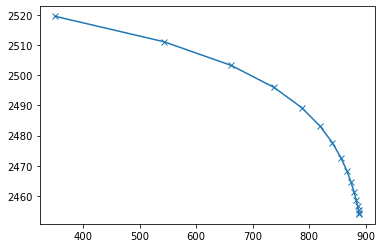

In [10]:
fig, ax = plt.subplots()

# ax.plot(ρ_gilbert, z , '-x')
ax.plot(p_wilson, z , '-x')

# ax.axhline(F)

# ax.invert_yaxis()

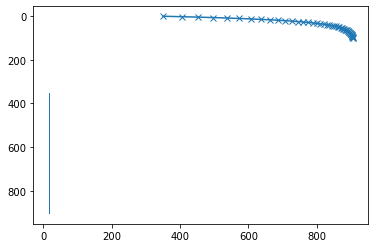

In [11]:
depth = np.linspace(0,100)

ρ_wilson  = ρ_i - (ρ_i - ρ_s) * np.exp(-0.05 * (depth))

fig, ax = plt.subplots()
ax.plot(ρ_wilson, depth, 'x-')
PC_idx = np.where((ρ_wilson > 780) * (ρ_wilson < 840))[0]
ax.fill_betweenx(ρ_wilson, PC_idx[0], PC_idx[-1])
ax.invert_yaxis()


In [12]:
PC_idx = np.where((ρ_wilson > 780) * (ρ_wilson < 840))

In [13]:
z   = src.Z.isel(coord_1=-15, t=-1).values[::-1]
z_s = z[0]


In [14]:
((z_s - F) - z) + F

array([9.5367432e-05, 8.4476051e+00, 1.6312351e+01, 2.3594578e+01,
       3.0294285e+01, 3.6411472e+01, 4.1946140e+01, 4.6898045e+01,
       5.1267429e+01, 5.5054050e+01, 5.8258396e+01, 6.0879978e+01,
       6.2919041e+01, 6.4375336e+01, 6.5249359e+01, 6.5540619e+01],
      dtype=float32)

In [15]:
z_s

2519.5427

In [16]:
src["zs accumulation flux 2"].isel(coord_2=-1, t=-1)

<xarray.DataArray 'zs accumulation flux 2' (coord_1: 147)>
array([-4.020179, -3.797196, -3.704512, -3.667655, -3.638275, -3.593727,
       -3.531029, -3.453643, -3.399363, -3.338029, -3.273655, -3.214494,
       -3.155025, -3.122183, -3.086999, -3.04703 , -3.015708, -2.965686,
       -2.903261, -2.845367, -2.80204 , -2.767579, -2.735973, -2.711035,
       -2.671687, -2.622529, -2.568014, -2.512452, -2.464611, -2.410295,
       -2.348806, -2.298032, -2.258113, -2.23245 , -2.208097, -2.19652 ,
       -2.18758 , -2.164576, -2.136285, -2.115394, -2.104187, -2.095179,
       -2.090273, -2.087205, -2.066772, -2.029633, -1.985867, -1.932586,
       -1.879014, -1.833279, -1.79626 , -1.800871, -1.806301, -1.803562,
       -1.792305, -1.774804, -1.756951, -1.743777, -1.739138, -1.742818,
       -1.749753, -1.739578, -1.736714, -1.735658, -1.730708, -1.718636,
       -1.697588, -1.668046, -1.639337, -1.608712, -1.443083, -1.428119,
       -1.348611, -1.32501 , -1.278617, -1.257579, -1.228376, -1.210014,
       -1.186853, -1.166897, -1.14474 , -1.12421 , -1.103261, -1.083486,
       -1.063964, -1.045072, -1.02601 , -1.006916, -0.988   , -0.969667,
       -0.951846, -0.934402, -0.91702 , -0.899251, -0.880569, -0.860808,
       -0.840483, -0.820335, -0.800652, -0.781099, -0.760904, -0.73892 ,
       -0.713733, -0.683722, -0.647015, -0.601962, -0.547122, -0.481749,
       -0.407625, -0.329436, -0.25301 , -0.182241, -0.118001, -0.059392,
       -0.004536,  0.049177,  0.105065,  0.165936,  0.23326 ,  0.306428,
        0.382419,  0.458235,  0.531429,  0.599834,  0.66284 ,  0.72287 ,
        0.782905,  0.84358 ,  0.904733,  0.96801 ,  1.037777,  1.119362,
        1.21937 ,  1.343437,  1.49135 ,  1.653527,  1.818536,  1.97887 ,
        2.129386,  2.267442,  2.39077 ,  2.499337,  2.594513,  2.678133,
        2.747888,  2.809229,  2.726831], dtype=float32)
Coordinates:
  * coord_1  (coord_1) float32 0.0 50.07 100.1 ... 7.21e+03 7.26e+03 7.31e+03
    coord_2  float32 1.0
    t        float32 1e+03
Attributes:
    Solver:    free surface evolution

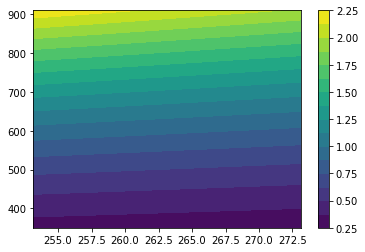

In [43]:
T_ptr = 273.16
rhos  = np.linspace(350,910,100)[:,None]
Temps = np.linspace(253.15,273.15)[None,:]

def conductivity_rho(rho): 
    return 2.4e-2 - 1.23e-4*rho + 2.5e-6*rho**2

def conductivity_temp(T): 
    return 9.828*np.exp(-5.7e-3*T)

k_rho = conductivity_rho(rhos)
k_910 = conductivity_rho(910)
k_ice = conductivity_temp(Temps)
k_ptr = conductivity_temp(T_ptr)


k = (k_ice/k_ptr) * k_rho


fig, ax = plt.subplots()

im = ax.contourf(Temps[0], rhos[:,0], k, levels=np.linspace(0.25,2.25, 17))

fig.colorbar(im)

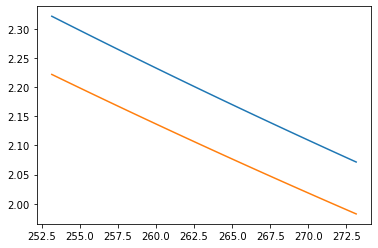

In [44]:
plt.plot(Temps[0], k_ice[0])
plt.plot(Temps[0], ((k_ice/k_ptr) * k_910)[0])

In [40]:
k_910

1.98232